<a href="https://colab.research.google.com/github/vishnuraghavendar2019/Exploratory-data-analysis-DA-21BDS0145/blob/main/cricket_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load datasets
odi_bat = pd.read_csv('/content/ODI bat.csv', encoding='latin1')
t20_bat = pd.read_csv('/content/t20 bat.csv', encoding='latin1')
test_bat = pd.read_csv('/content/test bat.csv', encoding='latin1')
odi_bowl = pd.read_csv('/content/ODI Bowl.csv', encoding='latin1')
test_bowl = pd.read_csv('/content/test bowl.csv', encoding='latin1')
t20_bowl = pd.read_csv('/content/t20 bowl.csv', encoding='latin1')
pitch_data = pd.read_csv('/content/pitch type.csv', encoding='latin1')
soil_data = pd.read_csv('/content/soil type.csv', encoding='latin1')
stadium_data = pd.read_csv('/content/stadium.csv', encoding='latin1')


print("Datasets loaded successfully.")
print("\nODI Batting Data Preview:\n", odi_bat.head())
print("\nODI Bowling Data Preview:\n", odi_bowl.head())
print("\nTest Batting Data Preview:\n", test_bat.head())
print("\nTest Bowling Data Preview:\n", test_bowl.head())
print("\nT20 Batting Data Preview:\n", t20_bat.head())
print("\nT20 Bowling Data Preview:\n", t20_bowl.head())
print("\nPitch Data Preview:\n", pitch_data.head())
print("\nSoil Data Preview:\n", soil_data.head())
print("\nStadium Data Preview:\n", stadium_data.head())

Datasets loaded successfully.

ODI Batting Data Preview:
                Player Country  Matches  Innings  Not outs  Runs  \
0       WA Young (NZ)      NZ       31       31         3  1263   
1    DJ Mitchell (NZ)      NZ       25       23         2  1229   
2  Shubman Gill (IND)     IND       28       28         3  1221   
3     RG Sharma (IND)     IND       26       25         2  1205   
4       V Kohli (IND)     IND       25       22         4  1102   

   Highest score Average  Balls faced  Strike rate  100  50  0   4s  6s  
0            105    45.1         1456        86.74    1  10  3  152  19  
1            134   58.52         1194       102.93    5   4  0   93  42  
2            121   48.84         1294        94.35    2  10  1  140  26  
3            131   52.39          970       124.22    2   9  2  128  65  
4            122   61.22         1214        90.77    4   8  1   99  14  

ODI Bowling Data Preview:
                  Player Country  Matches  Innings  Overs  Maidens  

In [2]:
# Check data types and initial structure
print(odi_bat.info())
print(odi_bowl.info())
print(test_bat.info())
print(test_bowl.info())
print(t20_bat.info())
print(t20_bowl.info())
print(pitch_data.info())
print(soil_data.info())
print(stadium_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         162 non-null    object 
 1   Country        162 non-null    object 
 2   Matches        162 non-null    int64  
 3   Innings        162 non-null    int64  
 4   Not outs       162 non-null    int64  
 5   Runs           162 non-null    int64  
 6   Highest score  162 non-null    int64  
 7   Average        162 non-null    object 
 8   Balls faced    162 non-null    int64  
 9   Strike rate    162 non-null    float64
 10  100            162 non-null    int64  
 11  50             162 non-null    int64  
 12  0              162 non-null    int64  
 13  4s             162 non-null    int64  
 14  6s             162 non-null    int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 19.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data c

In [3]:
# Step 3: Display missing values in each dataset
for name, df in zip(['ODI Batting', 'ODI Bowling', 'Test Batting', 'Test Bowling', 'T20 Batting', 'T20 Bowling', 'Pitch Data', 'Soil Data', 'Stadium Data'], [odi_bat, odi_bowl, test_bat, test_bowl, t20_bat, t20_bowl, pitch_data, soil_data, stadium_data]):
    missing = df.isnull().sum()
    print(f"{name} Missing Values:")
    print(missing[missing > 0])
    print("\n")


ODI Batting Missing Values:
Series([], dtype: int64)


ODI Bowling Missing Values:
Series([], dtype: int64)


Test Batting Missing Values:
Series([], dtype: int64)


Test Bowling Missing Values:
Series([], dtype: int64)


T20 Batting Missing Values:
Series([], dtype: int64)


T20 Bowling Missing Values:
Series([], dtype: int64)


Pitch Data Missing Values:
Series([], dtype: int64)


Soil Data Missing Values:
Series([], dtype: int64)


Stadium Data Missing Values:
Series([], dtype: int64)




In [4]:
# Step 4: Remove rows with null values in Player, Country, Runs, or Strike rate
for name, df in zip(['ODI Batting', 'ODI Bowling', 'Test Batting', 'Test Bowling', 'T20 Batting', 'T20 Bowling'], [odi_bat, odi_bowl, test_bat, test_bowl, t20_bat, t20_bowl]):
    if all(col in df.columns for col in ['Player', 'Country', 'Runs', 'Strike rate']):
        df.dropna(subset=['Player', 'Country', 'Runs', 'Strike rate'], inplace=True)
        print(f"{name}: Rows with null values in Player, Country, Runs, or Strike rate removed.")


ODI Batting: Rows with null values in Player, Country, Runs, or Strike rate removed.
ODI Bowling: Rows with null values in Player, Country, Runs, or Strike rate removed.
Test Batting: Rows with null values in Player, Country, Runs, or Strike rate removed.
Test Bowling: Rows with null values in Player, Country, Runs, or Strike rate removed.
T20 Batting: Rows with null values in Player, Country, Runs, or Strike rate removed.
T20 Bowling: Rows with null values in Player, Country, Runs, or Strike rate removed.


In [5]:
# Display data after removal
for name, df in zip(['ODI Batting', 'ODI Bowling', 'Test Batting', 'Test Bowling', 'T20 Batting', 'T20 Bowling'], [odi_bat, odi_bowl, test_bat, test_bowl, t20_bat, t20_bowl]):
    print(f"{name} After Null Removal:\n", df.head())

ODI Batting After Null Removal:
                Player Country  Matches  Innings  Not outs  Runs  \
0       WA Young (NZ)      NZ       31       31         3  1263   
1    DJ Mitchell (NZ)      NZ       25       23         2  1229   
2  Shubman Gill (IND)     IND       28       28         3  1221   
3     RG Sharma (IND)     IND       26       25         2  1205   
4       V Kohli (IND)     IND       25       22         4  1102   

   Highest score Average  Balls faced  Strike rate  100  50  0   4s  6s  
0            105    45.1         1456        86.74    1  10  3  152  19  
1            134   58.52         1194       102.93    5   4  0   93  42  
2            121   48.84         1294        94.35    2  10  1  140  26  
3            131   52.39          970       124.22    2   9  2  128  65  
4            122   61.22         1214        90.77    4   8  1   99  14  
ODI Bowling After Null Removal:
                  Player Country  Matches  Innings  Overs  Maidens  Runs  Wkts  \
0     

In [6]:
# Step 5: Convert numeric columns to proper data types
numeric_columns = ['Matches', 'Innings', 'Runs', 'Balls faced', 'Strike rate', 'Overs', 'Wkts', 'Economy', 'Average']
for df in [odi_bat, odi_bowl, test_bat, test_bowl, t20_bat, t20_bowl]:
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

for name, df in zip(['ODI Batting', 'ODI Bowling', 'Test Batting', 'Test Bowling', 'T20 Batting', 'T20 Bowling'], [odi_bat, odi_bowl, test_bat, test_bowl, t20_bat, t20_bowl]):
    print(f"{name} Data Types After Conversion:\n", df.dtypes)


ODI Batting Data Types After Conversion:
 Player            object
Country           object
Matches            int64
Innings            int64
Not outs           int64
Runs               int64
Highest score      int64
Average          float64
Balls faced        int64
Strike rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
dtype: object
ODI Bowling Data Types After Conversion:
 Player           object
Country          object
Matches           int64
Innings           int64
Overs           float64
Maidens           int64
Runs              int64
Wkts              int64
Average         float64
Economy         float64
Strike rate     float64
4                 int64
5                 int64
Bowling_Type     object
dtype: object
Test Batting Data Types After Conversion:
 Player            object
Country           object
Matches            int64
Innings            int64
Not outs           int64
Runs     

In [7]:
# Step 6: Remove duplicate rows from all datasets
for name, df in zip(['ODI Batting', 'ODI Bowling', 'Test Batting', 'Test Bowling', 'T20 Batting', 'T20 Bowling', 'Pitch Data', 'Soil Data', 'Stadium Data'], [odi_bat, odi_bowl, test_bat, test_bowl, t20_bat, t20_bowl, pitch_data, soil_data, stadium_data]):
    df.drop_duplicates(inplace=True)
    print(f"{name}: Duplicate rows removed. Current shape: {df.shape}")


ODI Batting: Duplicate rows removed. Current shape: (162, 15)
ODI Bowling: Duplicate rows removed. Current shape: (123, 14)
Test Batting: Duplicate rows removed. Current shape: (136, 15)
Test Bowling: Duplicate rows removed. Current shape: (92, 14)
T20 Batting: Duplicate rows removed. Current shape: (161, 15)
T20 Bowling: Duplicate rows removed. Current shape: (122, 14)
Pitch Data: Duplicate rows removed. Current shape: (5, 5)
Soil Data: Duplicate rows removed. Current shape: (4, 7)
Stadium Data: Duplicate rows removed. Current shape: (5, 10)


In [8]:
# Step 8: Standardize text data in categorical columns
for name, df in zip(['ODI Batting', 'ODI Bowling', 'Test Batting', 'Test Bowling', 'T20 Batting', 'T20 Bowling', 'Pitch Data', 'Soil Data', 'Stadium Data'], [odi_bat, odi_bowl, test_bat, test_bowl, t20_bat, t20_bowl, pitch_data, soil_data, stadium_data]):
    for col in df.select_dtypes(include=[object]).columns:
        df[col] = df[col].str.strip().str.title()
    print(f"{name}: Categorical text data standardized.\n", df.head())

ODI Batting: Categorical text data standardized.
                Player Country  Matches  Innings  Not outs  Runs  \
0       Wa Young (Nz)      Nz       31       31         3  1263   
1    Dj Mitchell (Nz)      Nz       25       23         2  1229   
2  Shubman Gill (Ind)     Ind       28       28         3  1221   
3     Rg Sharma (Ind)     Ind       26       25         2  1205   
4       V Kohli (Ind)     Ind       25       22         4  1102   

   Highest score  Average  Balls faced  Strike rate  100  50  0   4s  6s  
0            105    45.10         1456        86.74    1  10  3  152  19  
1            134    58.52         1194       102.93    5   4  0   93  42  
2            121    48.84         1294        94.35    2  10  1  140  26  
3            131    52.39          970       124.22    2   9  2  128  65  
4            122    61.22         1214        90.77    4   8  1   99  14  
ODI Bowling: Categorical text data standardized.
                  Player Country  Matches  Innin

In [9]:
# Step 9: Save cleaned datasets to CSV
odi_bat.to_csv('cleaned_odi_bat.csv', index=False)
odi_bowl.to_csv('cleaned_odi_bowl.csv', index=False)
test_bat.to_csv('cleaned_test_bat.csv', index=False)
test_bowl.to_csv('cleaned_test_bowl.csv', index=False)
t20_bat.to_csv('cleaned_t20_bat.csv', index=False)
t20_bowl.to_csv('cleaned_t20_bowl.csv', index=False)
pitch_data.to_csv('cleaned_pitch_data.csv', index=False)
soil_data.to_csv('cleaned_soil_data.csv', index=False)
stadium_data.to_csv('cleaned_stadium_data.csv', index=False)

print("All cleaned datasets have been saved successfully.")

All cleaned datasets have been saved successfully.


In [10]:
import pandas as pd

# Load cleaned datasets
odi_bat = pd.read_csv('cleaned_odi_bat.csv')
t20_bat = pd.read_csv('cleaned_t20_bat.csv')
test_bat = pd.read_csv('cleaned_test_bat.csv')
odi_bowl = pd.read_csv('cleaned_odi_bowl.csv')
t20_bowl = pd.read_csv('cleaned_t20_bowl.csv')
test_bowl = pd.read_csv('cleaned_test_bowl.csv')
pitch_data = pd.read_csv('cleaned_pitch_data.csv')
soil_data = pd.read_csv('cleaned_soil_data.csv')
stadium_data = pd.read_csv('cleaned_stadium_data.csv')


In [11]:
import numpy as np
# 1.1 Classify Batsmen (Defensive, Radical, Brute) based on format-specific strike rates

def classify_batsman(format_type, strike_rate):
    """
    Categorizes batsman as Defensive, Radical, or Brute based on strike rate & format.
    """
    if format_type == 'T20':
        if strike_rate <= 125:
            return 'Defensive'
        elif strike_rate <= 150:  # implicitly > 125
            return 'Radical'
        else:
            return 'Brute'
    elif format_type == 'ODI':
        if strike_rate <= 100:
            return 'Defensive'
        elif strike_rate <= 125:  # implicitly > 100
            return 'Radical'
        else:
            return 'Brute'
    elif format_type == 'TEST':
        if strike_rate < 50:
            return 'Defensive'
        elif strike_rate <= 100:  # implicitly >= 50
            return 'Radical'
        else:
            return 'Brute'
    return 'Unknown'  # fallback

# Apply the classification to each dataset
t20_bat['BatCategory'] = t20_bat['Strike rate'].apply(lambda x: classify_batsman('T20', x))
odi_bat['BatCategory'] = odi_bat['Strike rate'].apply(lambda x: classify_batsman('ODI', x))
test_bat['BatCategory'] = test_bat['Strike rate'].apply(lambda x: classify_batsman('TEST', x))

print("Batsmen classification completed for T20, ODI, and Test formats.")
print("\nT20 Batsmen after classification:\n", t20_bat[['Player', 'BatCategory']])
print("\nODI Batsmen after classification:\n", odi_bat[['Player', 'BatCategory']])
print("\nTest Batsmen after classification:\n", test_bat[['Player', 'BatCategory']])

Batsmen classification completed for T20, ODI, and Test formats.

T20 Batsmen after classification:
                 Player BatCategory
0        Pd Salt (Eng)       Brute
1     Jc Buttler (Eng)       Brute
2       Sa Yadav (Ind)       Brute
3    Rr Hendricks (Sa)     Radical
4      Ms Chapman (Nz)     Radical
..                 ...         ...
156    Jj Bumrah (Ind)   Defensive
157    Dl Chahar (Ind)   Defensive
158   Sh Johnson (Aus)   Defensive
159     Ts Mills (Eng)   Defensive
160    W O'Rourke (Nz)       Brute

[161 rows x 2 columns]

ODI Batsmen after classification:
                       Player BatCategory
0              Wa Young (Nz)   Defensive
1           Dj Mitchell (Nz)     Radical
2         Shubman Gill (Ind)   Defensive
3            Rg Sharma (Ind)     Radical
4              V Kohli (Ind)   Defensive
..                       ...         ...
157          D Foxcroft (Nz)   Defensive
158          Lr Morris (Aus)   Defensive
159  M Prasidh Krishna (Ind)   Defensive
160      

In [12]:
# ------------------
# STEP 2: ASSIGN WEIGHTS
# ------------------

# Example weighting:
# We give numeric weights to each batting category depending on format
WEIGHTS_BAT = {
    'T20': {
        'Defensive': 0.8,
        'Radical': 1.0,
        'Brute': 1.2
    },
    'ODI': {
        'Defensive': 1.0,
        'Radical': 1.1,
        'Brute': 1.1
    },
    'TEST': {
        'Defensive': 1.2,
        'Radical': 1.0,
        'Brute': 0.9
    }
}


print("WEIGHTS_BAT:\n", WEIGHTS_BAT)

WEIGHTS_BAT:
 {'T20': {'Defensive': 0.8, 'Radical': 1.0, 'Brute': 1.2}, 'ODI': {'Defensive': 1.0, 'Radical': 1.1, 'Brute': 1.1}, 'TEST': {'Defensive': 1.2, 'Radical': 1.0, 'Brute': 0.9}}


In [13]:
# For bowlers, consider economy or average important for T20, wicket-taking for Test, etc.
# We'll define a simple approach: pace vs. spin, etc.
# (Expand logic as needed)
WEIGHTS_BOWL = {
    'T20': {
        'Pace': 1.1,
        'Spin': 1.0
    },
    'ODI': {
        'Pace': 1.0,
        'Spin': 1.0
    },
    'TEST': {
        'Pace': 1.0,
        'Spin': 1.1
    }
}

# We'll use these weight dictionaries in Step 3 (Impact Score) to multiply relevant stats


print("Step 2 completed: Weights assigned to batting categories and bowling styles.")
print("\nWEIGHTS_BOWL:\n", WEIGHTS_BOWL)

Step 2 completed: Weights assigned to batting categories and bowling styles.

WEIGHTS_BOWL:
 {'T20': {'Pace': 1.1, 'Spin': 1.0}, 'ODI': {'Pace': 1.0, 'Spin': 1.0}, 'TEST': {'Pace': 1.0, 'Spin': 1.1}}


In [14]:


# Calculaing impact score fot batsmen:

def calculate_batting_impact(row, format_type):
    strike_rate = row['Strike rate']
    classification = classify_batsman(format_type, strike_rate)
    weight = WEIGHTS_BAT[format_type.upper()][classification]

    # Example formula: (avg * 0.4 + runs/1000 * 0.3) * type weight
    avg_score = row['Average'] if not pd.isna(row['Average']) else 0
    total_runs = row['Runs'] if not pd.isna(row['Runs']) else 0

    base_score = (avg_score * 0.4) + (total_runs / 1000 * 0.3)
    impact_score = base_score * weight
    return pd.Series([classification, impact_score])

# Assuming t20_bat DataFrame is already loaded
t20_bat[['BatsmanType', 'ImpactScore']] = t20_bat.apply(lambda row: calculate_batting_impact(row,'T20'), axis=1)
odi_bat[['BatsmanType', 'ImpactScore']] = odi_bat.apply(lambda row: calculate_batting_impact(row, 'ODI'), axis=1)
test_bat[['BatsmanType', 'ImpactScore']] = test_bat.apply(lambda row: calculate_batting_impact(row, 'TEST'), axis=1)

print("\nT20 Bat after classification and BatImpact:\n", t20_bat[['Player','BatCategory','ImpactScore']])


T20 Bat after classification and BatImpact:
                 Player BatCategory  ImpactScore
0        Pd Salt (Eng)       Brute     19.30128
1     Jc Buttler (Eng)       Brute     18.24948
2       Sa Yadav (Ind)       Brute     14.17548
3    Rr Hendricks (Sa)     Radical     12.66970
4      Ms Chapman (Nz)     Radical     14.08100
..                 ...         ...          ...
156    Jj Bumrah (Ind)   Defensive      0.00000
157    Dl Chahar (Ind)   Defensive      0.00000
158   Sh Johnson (Aus)   Defensive      0.00000
159     Ts Mills (Eng)   Defensive      0.00000
160    W O'Rourke (Nz)       Brute      0.00000

[161 rows x 3 columns]


In [15]:
def calculate_bowling_impact(row, format_type):
    btype = str(row['Bowling_Type']).lower()
    weight = WEIGHTS_BOWL.get(format_type.upper(), {}).get(btype, 1.0)

    # Clean inputs
    avg = row['Average'] if pd.notna(row['Average']) and row['Average'] > 0 else 50  # Assume worse if 0 or NaN
    econ = row['Economy'] if pd.notna(row['Economy']) and row['Economy'] > 0 else 10
    wkts = row['Wkts'] if pd.notna(row['Wkts']) else 0

    # Normalize inputs and calculate
    # More wickets = better, lower economy and average = better
    raw_score = weight * ((wkts * 1.0) + (50 / avg) + (10 / econ))

    # Clamp to non-negative
    impact_score = max(raw_score, 0)

    return pd.Series([btype.capitalize(), impact_score])

In [16]:
t20_bowl[['Bowling_Type', 'ImpactScore']] = t20_bowl.apply(lambda row: calculate_bowling_impact(row, 'T20'), axis=1)

odi_bowl[['Bowling_Type', 'ImpactScore']] = odi_bowl.apply(lambda row: calculate_bowling_impact(row, 'ODI'), axis=1)

test_bowl[['Bowling_Type', 'ImpactScore']] = test_bowl.apply(lambda row: calculate_bowling_impact(row, 'TEST'), axis=1)

In [17]:
# Show top impact bowlers
t20_bowl.sort_values('ImpactScore', ascending=False)[['Player', 'Bowling_Type', 'ImpactScore']].head(10)

,Player,Bowling_Type,ImpactScore
0,Arshdeep Singh (Ind),Pace,61.893160
1,Ravi Bishnoi (Ind),Spin,48.823015
2,Au Rashid (Eng),Spin,41.733582
3,A Zampa (Aus),Spin,38.855963
100,Rk Singh (Ind),Spin,38.666667
4,Ar Patel (Ind),Spin,38.066745
5,Cv Varun (Ind),Spin,36.763706
6,Tg Southee (Nz),Pace,34.465211
7,Mj Santner (Nz),Spin,32.699211
9,Mp Stoinis (Aus),Pace,30.957383


In [18]:
def tag_roles_and_identify_allrounders(batting_df, bowling_df, format_type,
                                       batting_threshold=5, bowling_threshold=15):
    bat_df = batting_df.copy()
    bowl_df = bowling_df.copy()

    bat_df.rename(columns={'ImpactScore': 'ImpactScore_bat'}, inplace=True)
    bowl_df.rename(columns={'ImpactScore': 'ImpactScore_bowl'}, inplace=True)

    merged_df = pd.merge(
        bat_df, bowl_df,
        on=['Player', 'Country'],
        how='outer'
    )

    merged_df['ImpactScore_bat'] = merged_df['ImpactScore_bat'].fillna(0)
    merged_df['ImpactScore_bowl'] = merged_df['ImpactScore_bowl'].fillna(0)

    def tag_role(row):
        bat_ok = row['ImpactScore_bat'] >= batting_threshold
        bowl_ok = row['ImpactScore_bowl'] >= bowling_threshold
        if bat_ok and bowl_ok:
            return 'allrounder'
        elif bat_ok:
            return 'batsman'
        elif bowl_ok:
            return 'bowler'
        else:
            return 'unknown'

    merged_df['Role'] = merged_df.apply(tag_role, axis=1)
    merged_df = merged_df[merged_df['Role'] != 'unknown'].reset_index(drop=True)
    merged_df['Format'] = format_type.upper()

    allrounder_names = set(merged_df[merged_df['Role'] == 'allrounder']['Player'])

    return merged_df, allrounder_names

# For T20
t20_merged, t20_allrounders = tag_roles_and_identify_allrounders(t20_bat, t20_bowl, 'T20')

# For ODI
odi_merged, odi_allrounders = tag_roles_and_identify_allrounders(odi_bat, odi_bowl, 'ODI')

# For Test
test_merged, test_allrounders = tag_roles_and_identify_allrounders(test_bat, test_bowl, 'TEST')

# Run the function
t20_merged, t20_allrounders = tag_roles_and_identify_allrounders(t20_bat, t20_bowl, 'T20')

# Print merged dataframe
print("=== Merged Player Dataset (T20) ===")
print(test_merged[['Player', 'Country', 'Role', 'ImpactScore_bat', 'ImpactScore_bowl', 'Bowling_Type', 'Format']])

# Print allrounders
print("\n=== Identified All-Rounders ===")
print(t20_allrounders)

=== Merged Player Dataset (T20) ===
                      Player Country        Role  ImpactScore_bat  \
0         Aap Atkinson (Eng)     Eng  allrounder          9.48960   
1            Ak Markram (Sa)      Sa     batsman         16.40640   
2           Akash Deep (Ind)     Ind      bowler          4.01388   
3            Am Rahane (Ind)     Ind     batsman         14.64380   
4             Ar Patel (Ind)     Ind     batsman         20.95790   
..                       ...     ...         ...              ...   
113            Wa Young (Nz)      Nz     batsman         17.01036   
114  Washington Sundar (Ind)     Ind  allrounder         13.99308   
115        Ybk Jaiswal (Ind)     Ind     batsman         21.69140   
116          Z Crawley (Eng)     Eng     batsman         13.73030   
117        Zubayr Hamza (Sa)      Sa     batsman         11.43420   

     ImpactScore_bowl Bowling_Type Format  
0           56.938301         Pace   TEST  
1            4.567783         Spin   TEST  
2  

In [19]:
t20_merged.to_csv('t20_merged.csv', index=False)
test_merged.to_csv('test_merged.csv', index=False)
odi_merged.to_csv('odi_merged.csv', index=False)

TRYING ML

In [20]:
"""def get_balanced_playing_eleven_and_subs(merged_df, team_name, format_type,
                                         num_batsmen=5, num_bowlers=4, num_allrounders=2, num_subs=3,
                                         unavailable_players=None):
    if unavailable_players is None:
        unavailable_players = []

    merged_df['Country'] = merged_df['Country'].str.strip().str.upper()
    merged_df['Format'] = merged_df['Format'].str.strip().str.upper()
    team_name = team_name.strip().upper()
    format_type = format_type.strip().upper()

    df = merged_df[
        (merged_df['Country'] == team_name) &
        (merged_df['Format'] == format_type) &
        (~merged_df['Player'].isin(unavailable_players))
    ].copy()

    if df.empty:
        print(f"No players found for {team_name} in {format_type}")
        return pd.DataFrame(), pd.DataFrame()

    df['ImpactScore_bowl'] = df['ImpactScore_bowl'].apply(lambda x: max(0, x) if pd.notnull(x) else x)

    df['AllrounderScore'] = df.apply(
        lambda row: (row['ImpactScore_bat'] + row['ImpactScore_bowl']) / 2
        if row['Role'] == 'allrounder' else None, axis=1
    )

    batsmen = df[df['Role'] == 'batsman'].sort_values(by='ImpactScore_bat', ascending=False).head(num_batsmen)
    bowlers = df[df['Role'] == 'bowler'].sort_values(by='ImpactScore_bowl', ascending=False).head(num_bowlers)
    allrounders = df[df['Role'] == 'allrounder'].sort_values(by='AllrounderScore', ascending=False).head(num_allrounders)

    playing_xi = pd.concat([batsmen, allrounders, bowlers])
    selected_players = set(playing_xi['Player'])

    if len(playing_xi) < 11:
        needed = 11 - len(playing_xi)
        remaining = df[~df['Player'].isin(selected_players)].copy()
        remaining['BestScore'] = remaining.apply(
            lambda row: row['AllrounderScore'] if row['Role'] == 'allrounder'
            else row['ImpactScore_bat'] if row['Role'] == 'batsman'
            else row['ImpactScore_bowl'], axis=1
        )
        fillers = remaining.sort_values(by='BestScore', ascending=False).head(needed)
        playing_xi = pd.concat([playing_xi, fillers])
        selected_players.update(fillers['Player'])

    playing_xi['RoleRank'] = playing_xi['Role'].map({'batsman': 1, 'allrounder': 2, 'bowler': 3})
    playing_xi = playing_xi.sort_values(by=['RoleRank', 'ImpactScore_bat', 'ImpactScore_bowl'], ascending=[True, False, False])

    remaining = df[~df['Player'].isin(selected_players)].copy()
    remaining['BestScore'] = remaining.apply(
        lambda row: row['AllrounderScore'] if row['Role'] == 'allrounder'
        else row['ImpactScore_bat'] if row['Role'] == 'batsman'
        else row['ImpactScore_bowl'], axis=1
    )
    substitutes = remaining.sort_values(by='BestScore', ascending=False).head(num_subs)

    return playing_xi.drop(columns=['RoleRank']).reset_index(drop=True), substitutes.reset_index(drop=True)"""


'def get_balanced_playing_eleven_and_subs(merged_df, team_name, format_type,\n                                         num_batsmen=5, num_bowlers=4, num_allrounders=2, num_subs=3,\n                                         unavailable_players=None):\n    if unavailable_players is None:\n        unavailable_players = []\n\n    merged_df[\'Country\'] = merged_df[\'Country\'].str.strip().str.upper()\n    merged_df[\'Format\'] = merged_df[\'Format\'].str.strip().str.upper()\n    team_name = team_name.strip().upper()\n    format_type = format_type.strip().upper()\n\n    df = merged_df[\n        (merged_df[\'Country\'] == team_name) &\n        (merged_df[\'Format\'] == format_type) &\n        (~merged_df[\'Player\'].isin(unavailable_players))\n    ].copy()\n\n    if df.empty:\n        print(f"No players found for {team_name} in {format_type}")\n        return pd.DataFrame(), pd.DataFrame()\n\n    df[\'ImpactScore_bowl\'] = df[\'ImpactScore_bowl\'].apply(lambda x: max(0, x) if pd.notnull(x) el

In [70]:
"""def get_balanced_playing_eleven_and_subs(merged_df, team_name, format_type,
                                         num_batsmen=5, num_bowlers=4, num_allrounders=2, num_subs=3,
                                         unavailable_players=None):
    if unavailable_players is None:
        unavailable_players = []

    # Normalize strings
    merged_df['Country'] = merged_df['Country'].str.strip().str.upper()
    merged_df['Format'] = merged_df['Format'].str.strip().str.upper()
    team_name = team_name.strip().upper()
    format_type = format_type.strip().upper()

    # Filter by team, format, and availability
    df = merged_df[
        (merged_df['Country'] == team_name) &
        (merged_df['Format'] == format_type) &
        (~merged_df['Player'].isin(unavailable_players))
    ].copy()

    if df.empty:
        print(f"No players found for {team_name} in {format_type}")
        return pd.DataFrame(), pd.DataFrame()

    # Clamp negative bowling impact scores to 0
    df['ImpactScore_bowl'] = df['ImpactScore_bowl'].apply(lambda x: max(0, x) if pd.notnull(x) else x)

    # Allrounder Score
    df['AllrounderScore'] = df.apply(
        lambda row: (row['ImpactScore_bat'] + row['ImpactScore_bowl']) / 2
        if row['Role'] == 'allrounder' else None, axis=1
    )

    # Select by role
    batsmen = df[df['Role'] == 'batsman'].sort_values(by='ImpactScore_bat', ascending=False).head(num_batsmen)
    bowlers = df[df['Role'] == 'bowler'].sort_values(by='ImpactScore_bowl', ascending=False).head(num_bowlers)
    allrounders = df[df['Role'] == 'allrounder'].sort_values(by='AllrounderScore', ascending=False).head(num_allrounders)

    # Combine and fill up to 11 if needed
    playing_xi = pd.concat([batsmen, allrounders, bowlers])
    selected_players = set(playing_xi['Player'])

    if len(playing_xi) < 11:
        needed = 11 - len(playing_xi)
        remaining = df[~df['Player'].isin(selected_players)].copy()
        remaining['BestScore'] = remaining.apply(
            lambda row: row['AllrounderScore'] if row['Role'] == 'allrounder'
            else row['ImpactScore_bat'] if row['Role'] == 'batsman'
            else row['ImpactScore_bowl'], axis=1
        )
        fillers = remaining.sort_values(by='BestScore', ascending=False).head(needed)
        playing_xi = pd.concat([playing_xi, fillers])
        selected_players.update(fillers['Player'])

    # Sort by role priority
    playing_xi['RoleRank'] = playing_xi['Role'].map({'batsman': 1, 'allrounder': 2, 'bowler': 3})
    playing_xi = playing_xi.sort_values(by=['RoleRank', 'ImpactScore_bat', 'ImpactScore_bowl'], ascending=[True, False, False])

    # Prepare substitutes
    remaining = df[~df['Player'].isin(selected_players)].copy()
    remaining['BestScore'] = remaining.apply(
        lambda row: row['AllrounderScore'] if row['Role'] == 'allrounder'
        else row['ImpactScore_bat'] if row['Role'] == 'batsman'
        else row['ImpactScore_bowl'], axis=1
    )
    substitutes = remaining.sort_values(by='BestScore', ascending=False).head(num_subs)

    return playing_xi.drop(columns=['RoleRank']).reset_index(drop=True), substitutes.reset_index(drop=True)"""

'def get_balanced_playing_eleven_and_subs(merged_df, team_name, format_type,\n                                         num_batsmen=5, num_bowlers=4, num_allrounders=2, num_subs=3,\n                                         unavailable_players=None):\n    if unavailable_players is None:\n        unavailable_players = []\n\n    # Normalize strings\n    merged_df[\'Country\'] = merged_df[\'Country\'].str.strip().str.upper()\n    merged_df[\'Format\'] = merged_df[\'Format\'].str.strip().str.upper()\n    team_name = team_name.strip().upper()\n    format_type = format_type.strip().upper()\n\n    # Filter by team, format, and availability\n    df = merged_df[\n        (merged_df[\'Country\'] == team_name) &\n        (merged_df[\'Format\'] == format_type) &\n        (~merged_df[\'Player\'].isin(unavailable_players))\n    ].copy()\n\n    if df.empty:\n        print(f"No players found for {team_name} in {format_type}")\n        return pd.DataFrame(), pd.DataFrame()\n\n    # Clamp negative bowling

In [21]:
# --------------------- Clean Toss Prediction Module ---------------------

# Install dependencies (if needed in fresh Colab)
# !pip install pandas scikit-learn matplotlib --quiet

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import random
import matplotlib.pyplot as plt

# Sample training data
data = pd.DataFrame({
    'SoilType': ['Black Soil', 'Red Soil', 'Loam Soil', 'Sandy Soil'] * 5,
    'PitchType': ['Green Top', 'Dry/Dusty', 'Flat', 'Rank Turner', 'Hard Pitch'] * 4,
    'Stadium': ['Wankhede Stadium', "Lord's", 'MCG', 'Wanderers', 'Eden Park'] * 4,
    'DewPresence': ['Yes', 'No'] * 10,
    'BatOrBowl': [random.choice(['Bat', 'Bowl']) for _ in range(20)]
})

# Encode categorical features
label_encoders = {}
for column in ['SoilType', 'PitchType', 'Stadium', 'DewPresence']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Encode target
bat_bowl_le = LabelEncoder()
data['BatOrBowl'] = bat_bowl_le.fit_transform(data['BatOrBowl'])

# Train the model
X = data[['SoilType', 'PitchType', 'Stadium', 'DewPresence']]
y = data['BatOrBowl']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Score data by stadium and format
score_data = {
    'Wankhede Stadium': {'T20': (180, 170), 'ODI': (280, 260), 'Test': (350, 330)},
    "Lord's": {'T20': (160, 150), 'ODI': (240, 220), 'Test': (320, 310)},
    'MCG': {'T20': (170, 165), 'ODI': (260, 250), 'Test': (330, 310)},
    'Wanderers': {'T20': (180, 175), 'ODI': (270, 260), 'Test': (340, 320)},
    'Eden Park': {'T20': (170, 160), 'ODI': (250, 240), 'Test': (320, 300)}
}

# --------------------- Main Toss Prediction Function ---------------------
def run_toss_prediction(soil_type, pitch_type, stadium, dew, match_format):
    encoded_input = [
        label_encoders['SoilType'].transform([soil_type])[0],
        label_encoders['PitchType'].transform([pitch_type])[0],
        label_encoders['Stadium'].transform([stadium])[0],
        label_encoders['DewPresence'].transform([dew])[0],
    ]

    prediction_encoded = model.predict([encoded_input])[0]
    bat_or_bowl = bat_bowl_le.inverse_transform([prediction_encoded])[0]

    # Score lookup
    first_innings, second_innings = score_data[stadium][match_format]

    score_diff = abs(first_innings - second_innings)
    if dew == 'Yes':
        win_bat = 55 + (score_diff // 5) if bat_or_bowl == 'Bat' else 45 - (score_diff // 5)
    else:
        win_bat = 50 + (score_diff // 5) if bat_or_bowl == 'Bat' else 50 - (score_diff // 5)

    win_bat = max(10, min(90, win_bat))
    win_bowl = 100 - win_bat

    return {
        'Bat or Bowl': bat_or_bowl,
        'Estimated Score Bat First': first_innings,
        'Estimated Score Bowl First': second_innings,
        'Winning % for Batting First': win_bat,
        'Winning % for Bowling First': win_bowl
    }

# --------------------- Optional Visualization ---------------------
def plot_results(result):
    labels = ['Bat First', 'Bowl First']
    win_chances = [result['Winning % for Batting First'], result['Winning % for Bowling First']]

    plt.bar(labels, win_chances, color=['green', 'blue'])
    plt.title('Winning Probability')
    plt.xlabel('Strategy')
    plt.ylabel('Winning Percentage')
    plt.ylim(0, 100)
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


{'Bat or Bowl': 'Bat', 'Estimated Score Bat First': 260, 'Estimated Score Bowl First': 250, 'Winning % for Batting First': 57, 'Winning % for Bowling First': 43}


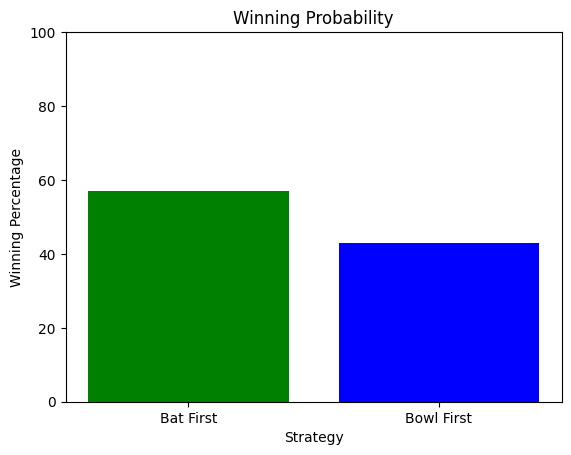

In [22]:
result = run_toss_prediction(
    soil_type="Red Soil",
    pitch_type="Flat",
    stadium="MCG",
    dew="Yes",
    match_format="ODI"
)

print(result)
plot_results(result)


<ipython-input-41-79cd3111f5b7>:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = merged_df.groupby(['Country', 'Format'], group_keys=False).apply(label_players)


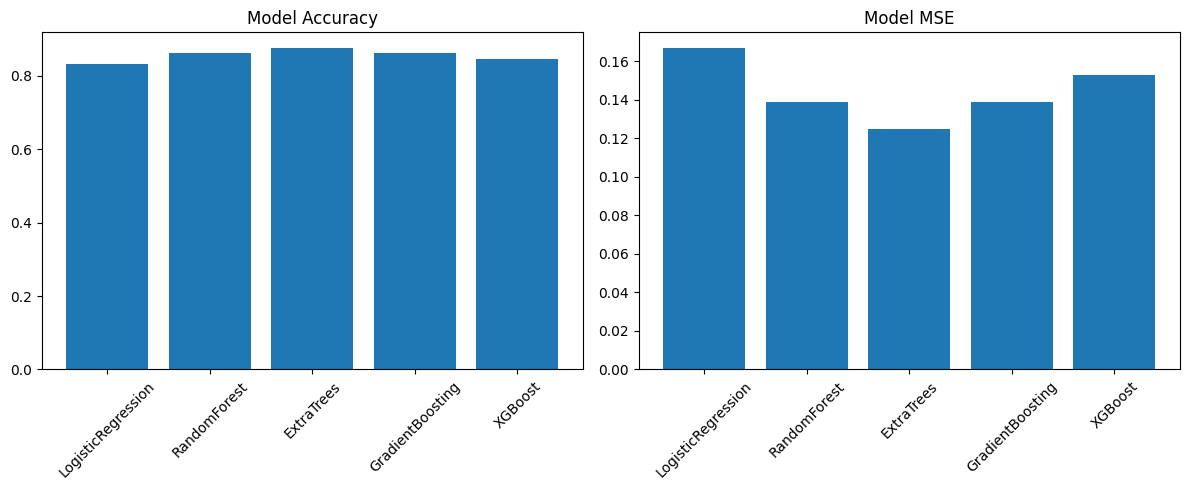

✅ Best model: ExtraTrees saved as 'best_model_pipeline.pkl'


In [41]:
# -------------------------------
# 🏏 Complete Code: Team 11 & Substitutes Predictor
# -------------------------------

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import joblib

# 2. Load & Merge Datasets
odi = pd.read_csv('/content/odi_merged.csv')
t20 = pd.read_csv('/content/t20_merged.csv')
test = pd.read_csv('/content/test_merged.csv')
merged_df = pd.concat([odi, t20, test], ignore_index=True)
merged_df.to_csv('merged_cricket.csv', index=False)

# 3. Normalize columns
merged_df['Country'] = merged_df['Country'].str.upper().str.strip()
merged_df['Format'] = merged_df['Format'].str.upper().str.strip()

# 4. Labeling Logic for Playing 11
def get_balanced_playing_eleven_and_subs(df, country, match_format,
                                         num_batsmen=5, num_bowlers=4, num_allrounders=2, num_subs=4):
    team = df[(df['Country'] == country) & (df['Format'] == match_format)].copy()
    if team.empty:
        return pd.DataFrame(), pd.DataFrame()
    team['Prob_Selected'] = team['ImpactScore_bat'] + team['ImpactScore_bowl']
    batsmen = team[team['Role'] == 'batsman'].nlargest(num_batsmen, 'Prob_Selected')
    allrounders = team[team['Role'] == 'allrounder'].nlargest(num_allrounders, 'Prob_Selected')
    bowlers = team[team['Role'] == 'bowler'].nlargest(num_bowlers, 'Prob_Selected')
    playing = pd.concat([batsmen, allrounders, bowlers])
    if len(playing) < 11:
        needed = 11 - len(playing)
        others = team[~team['Player'].isin(playing['Player'])]
        fillers = others.nlargest(needed, 'Prob_Selected')
        playing = pd.concat([playing, fillers])
    remaining = team[~team['Player'].isin(playing['Player'])]
    subs = remaining.nlargest(num_subs, 'Prob_Selected')
    return playing, subs

def label_players(df):
    sel, _ = get_balanced_playing_eleven_and_subs(df, df['Country'].iloc[0], df['Format'].iloc[0])
    df['Selected'] = df['Player'].isin(sel['Player']).astype(int)
    return df

merged_df = merged_df.groupby(['Country', 'Format'], group_keys=False).apply(label_players)

# 5. Feature Engineering
features = ['ImpactScore_bat', 'ImpactScore_bowl']
categorical = ['Format']
X = merged_df[features + categorical]
y = merged_df['Selected']

# 6. Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 8. Model Training & Evaluation
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=200),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

scores, mse_vals, pipelines = {}, {}, {}

for name, clf in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    pipe.fit(X_train, y_train)
    scores[name] = accuracy_score(y_test, pipe.predict(X_test))
    mse_vals[name] = mean_squared_error(y_test, pipe.predict(X_test))
    pipelines[name] = pipe

# 9. Plot Accuracy and MSE
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(scores.keys(), scores.values())
plt.title('Model Accuracy')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(mse_vals.keys(), mse_vals.values())
plt.title('Model MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Save the Best Model
best_name = max(scores, key=scores.get)
best_pipeline = pipelines[best_name]
joblib.dump(best_pipeline, 'best_model_pipeline.pkl')
print(f"✅ Best model: {best_name} saved as 'best_model_pipeline.pkl'")


In [25]:
# 🔁 API-Ready Playing XI Predictor
def predict_playing_xi_api(model_pipeline, merged_df,
                            teamA, teamB, fmt,
                            ua=None, ub=None, sa=None, sb=None):

    ua = ua or []
    ub = ub or []
    sa = sa or []
    sb = sb or []

    fmt = fmt.strip().upper()
    teamA = teamA.strip().upper()
    teamB = teamB.strip().upper()

    features = ['ImpactScore_bat', 'ImpactScore_bowl']
    categorical = ['Format']

    def select_team(country, unavailable, star):
        df = merged_df[(merged_df['Country'] == country) & (merged_df['Format'] == fmt)].copy()
        df = df[~df['Player'].isin(unavailable)]

        if df.empty:
            return pd.DataFrame(), pd.DataFrame()

        X_team = df[features + categorical]
        probs = model_pipeline.predict_proba(X_team)[:, 1]
        df['Prob_Selected'] = probs

        # Select star players first
        stars_df = df[df['Player'].isin(star)]
        df = df[~df['Player'].isin(stars_df['Player'])]

        bats = df[df['Role'] == 'batsman'].nlargest(5, 'Prob_Selected')
        allr = df[df['Role'] == 'allrounder'].nlargest(2, 'Prob_Selected')
        bowl = df[df['Role'] == 'bowler'].nlargest(4, 'Prob_Selected')

        team = pd.concat([stars_df, bats, allr, bowl]).drop_duplicates(subset='Player')

        if len(team) < 11:
            needed = 11 - len(team)
            others = df[~df['Player'].isin(team['Player'])]
            team = pd.concat([team, others.nlargest(needed, 'Prob_Selected')])

        subs = df[~df['Player'].isin(team['Player'])].nlargest(4, 'Prob_Selected')
        return team.head(11), subs

    teamA_xi, teamA_subs = select_team(teamA, ua, sa)
    teamB_xi, teamB_subs = select_team(teamB, ub, sb)

    return {
        "teamA": {
            "XI": teamA_xi[['Player', 'Role', 'Prob_Selected']].to_dict(orient="records"),
            "Substitutes": teamA_subs[['Player', 'Role', 'Prob_Selected']].to_dict(orient="records")
        },
        "teamB": {
            "XI": teamB_xi[['Player', 'Role', 'Prob_Selected']].to_dict(orient="records"),
            "Substitutes": teamB_subs[['Player', 'Role', 'Prob_Selected']].to_dict(orient="records")
        }
    }


In [26]:
best_model = joblib.load("best_model_pipeline.pkl")

result = predict_playing_xi_api(
    model_pipeline=best_model,
    merged_df=merged_df,
    teamA="IND",
    teamB="AUS",
    fmt="ODI",
    ua=["Shami"],
    ub=["Hazlewood"],
    sa=["Rohit Sharma"],
    sb=["Steve Smith"]
)

from pprint import pprint
pprint(result)


{'teamA': {'Substitutes': [{'Player': 'Shubman Gill\xa0(Ind)',
                            'Prob_Selected': 0.335,
                            'Role': 'batsman'},
                           {'Player': 'Sv Samson\xa0(Ind)',
                            'Prob_Selected': 0.02,
                            'Role': 'batsman'},
                           {'Player': 'Arshdeep Singh\xa0(Ind)',
                            'Prob_Selected': 0.0,
                            'Role': 'bowler'},
                           {'Player': 'Hh Pandya\xa0(Ind)',
                            'Prob_Selected': 0.0,
                            'Role': 'allrounder'}],
           'XI': [{'Player': 'Ar Patel\xa0(Ind)',
                   'Prob_Selected': 1.0,
                   'Role': 'batsman'},
                  {'Player': 'B Sai Sudharsan\xa0(Ind)',
                   'Prob_Selected': 1.0,
                   'Role': 'batsman'},
                  {'Player': 'Kl Rahul\xa0(Ind)',
                   'Prob_Selected': 1

In [49]:
def toss_visualizer(result):
    return (
        f"🏏 **Strategy:** Bat {'First' if result['Bat or Bowl'] == 'Bat' else 'Second'}",
        f"🔢 **Expected 1st Innings Score:** {result['Estimated Score Bat First']}",
        f"🔢 **Expected 2nd Innings Score:** {result['Estimated Score Bowl First']}",
        f"📈 Batting First Win %: {result['Winning % for Batting First']}%",
        f"📉 Bowling First Win %: {result['Winning % for Bowling First']}%"
    )


In [50]:
def plot_donut_chart(result):
    labels = ['Batting First', 'Bowling First']
    values = [result['Winning % for Batting First'], result['Winning % for Bowling First']]
    colors = ['#66bb6a', '#263238']

    fig, ax = plt.subplots(figsize=(4, 4))
    wedges, texts, autotexts = ax.pie(
        values, labels=labels, autopct='%1.0f%%', startangle=140,
        colors=colors, textprops=dict(color="white"), wedgeprops=dict(width=0.4)
    )
    ax.set_title("Winning Probability", fontsize=14)
    return fig


In [51]:
gr.Plot(label="Win Probability Chart")


In [52]:
def generate_match_commentary(result, pitch_type, dew, stadium):
    bat_adv = result['Winning % for Batting First']
    msg = f"Given the {pitch_type.lower()} pitch and {'dew expected' if dew == 'Yes' else 'dry match'} conditions at **{stadium}**, "
    msg += "batting first " if bat_adv > 50 else "bowling first "
    msg += "offers a strategic edge. Aim for a competitive total around **" + str(result['Estimated Score Bat First']) + "** to build pressure."
    return msg


In [53]:
gr.Markdown(label="Match Analysis")


In [55]:
with gr.Blocks() as app:
    with gr.Row():
        with gr.Column():
            output1 = gr.Textbox(label="Strategy")
            output2 = gr.Textbox(label="Estimated Score")

        with gr.Column():
            chart = gr.Plot()


In [70]:
print(merged_df.head())

               Player Country  Matches_x  Innings_x  Not outs  Runs_x  \
0       A Zampa (Aus)     AUS       31.0       17.0       5.0   121.0   
1  Aap Atkinson (Eng)     ENG       10.0        7.0       2.0    66.0   
2       Ac Agar (Aus)     AUS        2.0        2.0       1.0    65.0   
3       Af Milne (Nz)      NZ        8.0        5.0       1.0    12.0   
4     Ak Markram (Sa)      SA       27.0       27.0       5.0  1099.0   

   Highest score  Average_x  Balls faced  Strike rate_x  ...  Economy  \
0           29.0      10.08        163.0          74.23  ...     5.74   
1           35.0      13.20         57.0         115.78  ...     6.41   
2           48.0      65.00         90.0          72.22  ...     4.26   
3            4.0       3.00         40.0          30.00  ...     6.01   
4          175.0      49.95       1028.0         106.90  ...     5.52   

   Strike rate_y    4    5  Bowling_Type ImpactScore_bowl     Role  Format  \
0           29.1  5.0  0.0          Spin    

In [45]:
# STEP 1: Install dependencies
!pip install gradio pandas scikit-learn matplotlib xgboost joblib --quiet


In [35]:
!pip install gradio --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00


In [57]:
!pip install fpdf --quiet


  Preparing metadata (setup.py) ... done


In [81]:
# ✅ Cricket Match Predictor — Complete with Toss, XI, Radar, Player Comparison

import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cricket_team import run_toss_prediction, predict_playing_xi_api, merged_df, best_model

plt.style.use('dark_background')

TEAM_COLORS = {
    "IND": "#2962FF",
    "AUS": "#FFEB3B",
    "NZ": "#00ACC1",
    "SA": "#66BB6A",
    "ENG": "#E53935",
}

TEAM_XI_CACHE = {}

def role_balance_radar(df1, df2, teamA, teamB):
    roles = ['batsman', 'bowler', 'allrounder']
    values1 = [df1['Role'].str.lower().value_counts().get(r, 0) for r in roles]
    values2 = [df2['Role'].str.lower().value_counts().get(r, 0) for r in roles]
    values1 += values1[:1]
    values2 += values2[:1]
    angles = np.linspace(0, 2 * np.pi, len(values1), endpoint=True)

    fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw=dict(polar=True), facecolor='black')
    color1 = TEAM_COLORS.get(teamA.upper(), '#00e676')
    color2 = TEAM_COLORS.get(teamB.upper(), '#ff7043')

    ax.plot(angles, values1, color=color1, linewidth=2, label=teamA)
    ax.fill(angles, values1, alpha=0.3, color=color1)
    ax.plot(angles, values2, color=color2, linewidth=2, label=teamB)
    ax.fill(angles, values2, alpha=0.3, color=color2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(roles, color='white', fontsize=12, weight='bold')
    ax.set_yticklabels([])
    ax.spines['polar'].set_color('white')
    ax.set_title('🧭 Role Balance Radar Chart', color='cyan', fontsize=14, weight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15), labelcolor='white')
    return fig

def toss_strategy(soil, pitch, stadium, dew, fmt):
    result = run_toss_prediction(soil, pitch, stadium, dew, fmt.upper())
    fig, ax = plt.subplots(figsize=(5, 5), facecolor='black')
    sizes = [result['Winning % for Batting First'], result['Winning % for Bowling First']]
    labels = ['Bat First', 'Bowl First']
    colors = ['#29b6f6', '#ef5350']
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
           textprops={'color': 'white', 'fontsize': 12}, wedgeprops=dict(width=0.4, edgecolor='black'))
    ax.set_title('Toss Win Probability', fontsize=14, color='cyan')
    return result['Bat or Bowl'], result['Estimated Score Bat First'], result['Estimated Score Bowl First'], result['Winning % for Batting First'], result['Winning % for Bowling First'], fig

def predict_teams_and_cache(teamA, starsA, unavailA, teamB, starsB, unavailB, fmt):
    starsA = [s.strip().title() for s in starsA.split(',') if s.strip()]
    unavailA = [u.strip().title() for u in unavailA.split(',') if u.strip()]
    starsB = [s.strip().title() for s in starsB.split(',') if s.strip()]
    unavailB = [u.strip().title() for u in unavailB.split(',') if u.strip()]

    result = predict_playing_xi_api(best_model, merged_df, teamA.upper(), teamB.upper(), fmt.upper(), unavailA, unavailB, starsA, starsB)

    df1 = pd.DataFrame(result['teamA']['XI'])
    df2 = pd.DataFrame(result['teamA']['Substitutes'])
    df3 = pd.DataFrame(result['teamB']['XI'])
    df4 = pd.DataFrame(result['teamB']['Substitutes'])

    TEAM_XI_CACHE['teamA'] = df1['Player'].tolist()
    TEAM_XI_CACHE['teamB'] = df3['Player'].tolist()
    TEAM_XI_CACHE['format'] = fmt

    radar_fig = role_balance_radar(df1, df3, teamA, teamB)

    return df1, df2, df3, df4, radar_fig

def compare_players(player1, player2, fmt):
    def extract_stats(name):
        row = merged_df[(merged_df['Player'].str.strip().str.lower() == name.strip().lower()) &
                        (merged_df['Format'].str.strip().str.upper() == fmt.strip().upper())]
        if row.empty:
            return {'Player': name, 'Average': 0, 'StrikeRate': 0, 'Economy': 0, 'Wickets': 0}
        r = row.iloc[0]
        return {
            'Player': f"{r['Player']} ({r['Country']})",
            'Average': r.get('Average_x', 0) or 0,
            'StrikeRate': r.get('Strike rate_x', 0) or 0,
            'Economy': r.get('Economy', 0) or 0,
            'Wickets': r.get('Wickets', 0) or 0
        }

    p1 = extract_stats(player1)
    p2 = extract_stats(player2)

    categories = ['Average', 'StrikeRate', 'Economy', 'Wickets']
    p1_vals = [p1[c] for c in categories]
    p2_vals = [p2[c] for c in categories]

    x = np.arange(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(x - width/2, p1_vals, width, label=p1['Player'], color='#64b5f6', edgecolor='white', linewidth=1.5)
    ax.bar(x + width/2, p2_vals, width, label=p2['Player'], color='#ef9a9a', edgecolor='white', linewidth=1.5)

    ax.set_ylabel('Stat Value', fontsize=12, color='white')
    ax.set_title(f"🔥 Head-to-Head Player Stats in {fmt.upper()} Format", fontsize=15, weight='bold', color='cyan')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=12, color='white')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, labelcolor='white')

    for i, val in enumerate(p1_vals):
        ax.text(x[i] - width/2, val + 1, f'{val:.1f}', ha='center', color='white')
    for i, val in enumerate(p2_vals):
        ax.text(x[i] + width/2, val + 1, f'{val:.1f}', ha='center', color='white')

    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')
    ax.tick_params(colors='white')

    return fig

def run_interface():
    with gr.Blocks(title="Cricket Match Predictor") as app:
        gr.Markdown("## 🏏 Cricket Match Predictor | Toss | XI | Radar | Comparison")

        with gr.Tab("🧠 Team XI & Radar"):
            teamA = gr.Dropdown(["IND", "AUS", "NZ", "SA", "ENG"], label="Team A")
            teamB = gr.Dropdown(["IND", "AUS", "NZ", "SA", "ENG"], label="Team B")
            starsA = gr.Textbox(label="Star Players A (comma separated)")
            starsB = gr.Textbox(label="Star Players B (comma separated)")
            unavailA = gr.Textbox(label="Unavailable Players A")
            unavailB = gr.Textbox(label="Unavailable Players B")
            fmt_team = gr.Dropdown(["T20", "ODI", "TEST"], label="Match Format")

            teamA_xi = gr.Dataframe(label="Team A XI")
            teamA_subs = gr.Dataframe(label="Team A Substitutes")
            teamB_xi = gr.Dataframe(label="Team B XI")
            teamB_subs = gr.Dataframe(label="Team B Substitutes")
            radar_plot = gr.Plot(label="🎯 Role Comparison Radar")

            gr.Button("Predict Teams & Radar").click(
                predict_teams_and_cache,
                inputs=[teamA, starsA, unavailA, teamB, starsB, unavailB, fmt_team],
                outputs=[teamA_xi, teamA_subs, teamB_xi, teamB_subs, radar_plot]
            )

        with gr.Tab("🎯 Toss Strategy"):
            soil = gr.Dropdown(["Black Soil", "Red Soil", "Loam Soil", "Sandy Soil"], label="Soil Type")
            pitch = gr.Dropdown(["Green Top", "Dry/Dusty", "Flat", "Rank Turner", "Hard Pitch"], label="Pitch Type")
            stadium = gr.Dropdown(["Wankhede Stadium", "Lord's", "MCG", "Wanderers", "Eden Park"], label="Stadium")
            dew = gr.Radio(["Yes", "No"], label="Dew Present?")
            fmt = gr.Dropdown(["T20", "ODI", "TEST"], label="Match Format")

            batbowl = gr.Textbox(label="Recommended Toss Decision")
            est_bat = gr.Number(label="Estimated Score Bat First")
            est_bowl = gr.Number(label="Estimated Score Bowl First")
            winbat = gr.Number(label="Win % Batting First")
            winbowl = gr.Number(label="Win % Bowling First")
            donut_chart = gr.Plot(label="🍩 Toss Outcome")

            gr.Button("Run Toss Analysis").click(
                toss_strategy,
                inputs=[soil, pitch, stadium, dew, fmt],
                outputs=[batbowl, est_bat, est_bowl, winbat, winbowl, donut_chart]
            )

        with gr.Tab("⚔️ Player Comparison"):
            fmt_compare = gr.Dropdown(["T20", "ODI", "TEST"], label="Match Format")
            player1 = gr.Dropdown(choices=[], label="Select Player from Team A")
            player2 = gr.Dropdown(choices=[], label="Select Player from Team B")
            output_plot = gr.Plot(label="📊 Head-to-Head Comparison")

            def populate_team_players():
                return (
                    gr.update(choices=TEAM_XI_CACHE.get("teamA", [])),
                    gr.update(choices=TEAM_XI_CACHE.get("teamB", []))
                )

            gr.Button("Load Players from Predicted Teams").click(
                fn=populate_team_players,
                outputs=[player1, player2]
            )

            gr.Button("Compare").click(compare_players, inputs=[player1, player2, fmt_compare], outputs=output_plot)

    app.launch(share=True)

run_interface()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8e8cce7826b0b8917c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
